# Classificador Gato x Cachorro x Nicolas Cage

Neste exercício nós vamos praticar os seguintes conceitos:

*   Como obter imagens para o nosso classificador com o Google (Image Crawler/Scrapper)
*   Como preparar as imagens para classificação num experimento real
*   Como treinar do zero uma rede convolucional com Tensorflow/Keras para classificação
*   Como utilizar modelos pré-treinados com aprendizado por transferência (Transfer Learning) para classificação de imagens



Os métodos abaixo utilizados foram baseados nos seguintes posts:
- https://medium.com/@gianfrancescoangelini/how-to-create-a-dataset-in-google-colab-for-your-machine-learning-projects-c1852d62936e
- https://towardsdatascience.com/cat-dog-or-elon-musk-145658489730

### Atividade 1: Obtenção das imagens via "web scrapping" o Google Images

Para isso utilizaremos uma biblioteca para facilitar a nossa vida chamada "Google Images Download". No entanto, utilizaremos um "fork" dela feito pela comunidade que lida com as atualizações recentes que o Google fez na sua página de imagens. A biblioteca utiliza outra biblioteca mais geral de web scraping como base (Selenium) que simula a navegação de uma pessoa por um navegador, para isso ela precisa do executável do navegador disponível para utilização. 

In [1]:
!wget https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip  && unzip chromedriver_linux64
!rm chromedriver_linux64.zip

--2020-12-19 12:45:25--  https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 173.194.215.128, 2607:f8b0:400c:c0c::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4039043 (3.9M) [application/zip]
Saving to: ‘chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   3.85M  --.-KB/s    in 0.03s   

2020-12-19 12:45:25 (123 MB/s) - ‘chromedriver_linux64.zip’ saved [4039043/4039043]

Archive:  chromedriver_linux64.zip
replace chromedriver? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Google Images Download library
versão com ajustes pela comunidade

https://github.com/hardikvasa/google-images-download

In [ ]:
!pip install selenium
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd google-images-download && python setup.py install

In [3]:
colab_path = '/content/'
chromedriver_path = '/content/chromedriver'

Agora vamos importar a biblioteca e passar alguns parâmetros para download das imagens.

Tip: Observar todas as possibilidades de argumentos presentes no
https://google-images-download.readthedocs.io/en/latest/arguments.html

Em caso de algum erro por não encontrar o módulo "google_images_download", restart the RunTime e execute as células mais uma vez.

In [4]:
# Download imagens de cachorros

from google_images_download import google_images_download

keyword   = "dog"
limit = 100 # O máximo de download por vez é de 100 imagens 
chromedriver = chromedriver_path
color_type	= None # Tipo de cores para aplicar as imagens -> [full-color, black-and-white, transparent]
size = None  # Tamanho relativo das imagens a serem baixadas -> [large, medium, icon, >400*300, >640*480, >800*600, >1024*768, >2MP, >4MP, >6MP, >8MP, >10MP, >12MP, >15MP, >20MP, >40MP, >70MP]
usage_rights	= None # Dá até para especificar qual o tipo de licença que você quer que as imagens baixadas apresentem

arguments = {
        "keywords" : keyword,
        "limit" : limit,
        "chromedriver": chromedriver,
        "color_type" : color_type,
        "size" : size,
        "usage_rights" : usage_rights
        }

response = google_images_download.googleimagesdownload()
_ = response.download(arguments)  


Item no.: 1 --> Item name = dog
Evaluating...
Starting Download...
Completed Image ====> 1.maxresdefault.jpg
Completed Image ====> 2.322868_1100-1100x628.jpg
Completed Image ====> 3.dog-puppy-on-garden-royalty-free-image-1586966191.jpg
Completed Image ====> 4.3408.jpg
Completed Image ====> 5.collage_of_nine_dogs.jpg
Completed Image ====> 6.1800x1200_dog_cool_summer_other.jpg
Completed Image ====> 7.5484d9d1eab8ea3017b17e29.jpg
Completed Image ====> 8.dogs_1280p_0.jpg
Completed Image ====> 9.file-20200309-118956-1cqvm6j.jpg
Completed Image ====> 10.yellow-labrador-retriever.jpg
Completed Image ====> 11.969.jpg
Completed Image ====> 12.dog-landing-hero-lg.jpg
Completed Image ====> 13.d41586-020-01430-5_17977552.jpg
Completed Image ====> 14.domestic-dog_thumb.jpg
Completed Image ====> 15.191114120109-dog-aging-project-1-super-tease.jpg
Completed Image ====> 16.cute-dog-headshot.jpg
Completed Image ====> 17.adorable-white-pomeranian-puppy-spitz-921029690-5c8be25d46e0fb000172effe.jpg
Compl

In [5]:
# Download imagens de gatos

keyword   = "cat"
limit = 100
chromedriver = chromedriver_path
color_type	= None
size    = None  
usage_rights	= None

arguments = {
        "keywords" : keyword,
        "limit" :limit,
        "chromedriver":chromedriver,
        "color_type" : color_type,
        "size" : size,
        "usage_rights" : usage_rights
        }

response = google_images_download.googleimagesdownload()
_ = response.download(arguments)  


Item no.: 1 --> Item name = cat
Evaluating...
Starting Download...
Completed Image ====> 1.thinking-of-getting-a-cat.png
Completed Image ====> 2.kitten-440379.jpg
Completed Image ====> 3.92e141f8-36e4-4331-bb2ee42ac8674dd3_source.jpg
Completed Image ====> 4.1800x1200_cat_relaxing_on_patio_other.jpg
Completed Image ====> 5.kitten-510651.jpg
Completed Image ====> 6.67586673.jpg
Completed Image ====> 7.cute-3281819_1920.jpg
Completed Image ====> 8._111434467_gettyimages-1143489763.jpg
Completed Image ====> 9.vsy6kjdnq2psxsczb6cvyf.jpg
Completed Image ====> 10.layer-1704-1920x840.jpg
Completed Image ====> 11.22virus-petcats1-mediumsquareat3x.jpg
Completed Image ====> 12.file-20200803-24-50u91u.jpg
Completed Image ====> 13.1800x1200_is_my_cat_normal_slideshow.jpg
Completed Image ====> 14.32665e6f-8d90-4567-9769d59e11db7f26_source.jpg
Completed Image ====> 15.john-tecuceanu-1557217-unsplash-1024x683.jpg
Completed Image ====> 16.2945.jpg
Completed Image ====> 17.190718181632-cats-movie-trail

In [6]:
# Download imagens de Nicolas Cage

keyword   = "Nicolas Cage"
limit = 100
chromedriver = chromedriver_path
color_type	= None
size    = None  
usage_rights	= None

arguments = {
        "keywords" : keyword,
        "limit" :limit,
        "chromedriver":chromedriver,
        "color_type" : color_type,
        "size" : size,
        "usage_rights" : usage_rights
        }

response = google_images_download.googleimagesdownload()
_ = response.download(arguments)  


Item no.: 1 --> Item name = Nicolas Cage
Evaluating...
Starting Download...
Completed Image ====> 1.nicolas_cage_deauville_2013.jpg
Completed Image ====> 2.nicolas_cage_nicolas_cage_split-compressed.jpg
Completed Image ====> 3.nicolas_cage_-_66%c3%a8me_festival_de_venise_%28mostra%29.jpg
Completed Image ====> 4.nicolas-cage-9234498-1-402.jpg
Completed Image ====> 5.nicolas-cage-1580830257.jpg
Completed Image ====> 6.nicolas-cage-movie-unbearable-weight-of-massive-talent.jpg
Completed Image ====> 7.6359a2a35db664d45ac31794d122d4c8a7-15-nic-cage.rsocial.w1200.jpg
Completed Image ====> 8.mv5bmjuxmje4mtqxmf5bml5banbnxkftztcwnzc2mdm1na@@._v1_.jpg
Completed Image ====> 9.nicolas-cage-1580830257.jpg
Completed Image ====> 10.cage-manson.jpg
Completed Image ====> 11.10324474a.jpg
Completed Image ====> 12.106069731-1565297100509gettyimages-1052370114.jpeg
Completed Image ====> 13.0ebc0d91053ec3e8a81724d8a8f09025.jpg
Completed Image ====> 14.image.jpg
Completed Image ====> 15.nicolas-cage.jpg
Co

Agora, vamos dar uma olhada nas imagens baixadas para saber se elas realmente representam a sua classe.



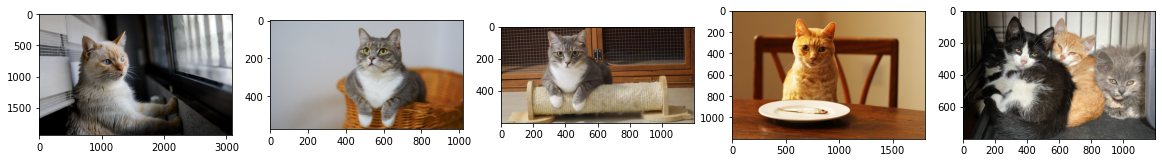

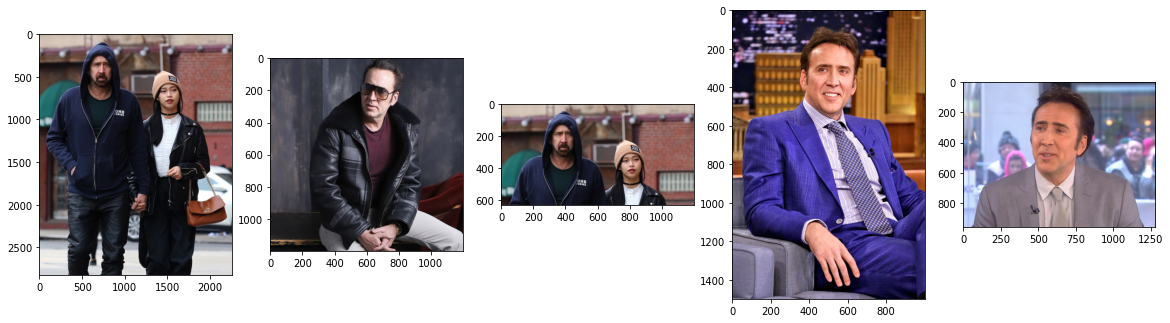

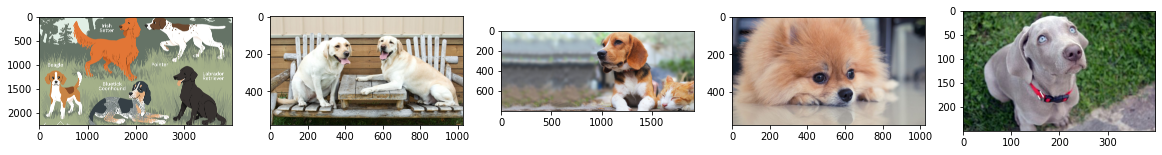

In [7]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

numero_de_plots = 5

for pasta in os.listdir('/content/downloads/'):
  plt.figure(figsize=(20, 10))
  dataset_path = 'downloads/' + pasta + '/'
  lista_de_imagens = os.listdir(dataset_path)[:numero_de_plots]

  for i, img in enumerate(lista_de_imagens):
    plt.subplot(1, len(lista_de_imagens), i+1)
    plt.imshow( plt.imread( dataset_path + img ) )

Para finalizar vamos checar se as imagens estão com extensões válidas para trabalho vamos utilizar a função abaixo:

https://stackoverflow.com/questions/64225718/keras-imagedatagenerator-pil-unidentifiedimageerror



In [8]:
def check_images(dir):
    import cv2 
    bad_list=[]
    good_list=[]
    good_exts=['jpg', 'png', 'bmp','tiff','jpeg', 'gif'] # make a list of acceptable image file types
    for klass in os.listdir(dir) :  # iterate through the sub directories 
        class_path=os.path.join (dir, klass) # create path to sub directory 
        if os.path.isdir(class_path):
            for f in os.listdir(class_path): # iterate through image files
                    f_path=os.path.join(class_path, f) # path to image files
                    ext=f[f.rfind('.')+1:] # get the files extension
                    if ext not in good_exts:
                            print(f'file {f_path}  has an invalid extension {ext}')
                            bad_list.append(f_path)                    
                    else:
                        try: 
                            img = cv2.imread(f_path)
                            size = img.shape
                            good_list.append(f_path)
                        except:
                            print(f'file {f_path} is not a valid image file ')
                            bad_list.append(f_path)
        else:
            print(f'** WARNING ** directory {dir} has files in it, it should only contain sub directories')

    return good_list, bad_list

_, lista_de_problemas = check_images('./downloads/')

file ./downloads/cat/19._70e9d6ee-8af0-11ea-8bae-d48e751bd032.jpeg.webp  has an invalid extension webp
file ./downloads/cat/87.cat-close-to-screen.jpg.webp  has an invalid extension webp
file ./downloads/cat/98.9781328489906.gif is not a valid image file 
file ./downloads/Nicolas Cage/55.nicolas-cage.jpg is not a valid image file 
file ./downloads/Nicolas Cage/28.nicolas-cage-380.jpg.webp  has an invalid extension webp
file ./downloads/Nicolas Cage/62.telemmglpict000135601060_trans_nvbqzqnjv4bq0cfmalfde88gey3o6dwjb8rjaf2rblxxy5a9gp_uu5e.jpeg.webp  has an invalid extension webp
file ./downloads/dog/98.white-pomeranian-dog-istock.jpg.webp  has an invalid extension webp


In [9]:
# Removendo imagens problemáticas

for img in lista_de_problemas:
  os.remove(img)

### Atividade 2: Criar função para pré-processamento das imagens antes do treinamento

Uma vez que as imagens já foram obtidas, precisamos padronizar o tamanho delas e normalizá-las a fim de otimizar o treinamento com as redes neurais.

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img as tf_load_img
import numpy as np

def pre_processing_img(img):
    img = img.astype('float32')
    img = img / 255.0
    return img

# Função para leitura e aplicar o pré-processamento na imagem
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))

    X[0, ] = np.asarray(tf_load_img(
        img_file, 
        target_size=target_size)
    )

    return pre_processing_img(X) # Retorna imagem escalada

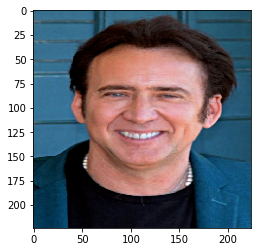

In [12]:
# Exemplo de imagem escalada

amostra_nicolas_cage = load_image('/content/downloads/Nicolas Cage/1.nicolas_cage_deauville_2013.jpg')

_ = plt.imshow(amostra_nicolas_cage.squeeze())

Agora, vamos criar uma função para "data augmentation" que irá gerar variações dos exemplos de cada classe. Para isso vamos utilizar as ferramentas do próprio Tensorflow/Keras. Para gerar variações reais vamos utilizar os efeitos de "shear" e zoom, assim como também a aplicação de um flip horizontal nas imagens. O efeito de "shear" é uma distorção ao longo do eixo x ou y que aumenta a probabilidade de reconhecer objetos em ângulos diferentes.

Tip: Para conhecer diferentes possibilidades de aumentação dos dados, é só dar uma olhada na documentação dos parâmetros do ImageDataGenerator.

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator


In [13]:
# Criando pasta para armazenar exemplos de treinamento e validação "aumentados"
# para que a gente possa checar.

# Função para criar uma pasta caso ela não exista
def criar_pasta(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=pre_processing_img,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

criar_pasta('/content/training_aug')
criar_pasta('/content/validation_aug')

training = datagen.flow_from_directory( 
    '/content/downloads/', 
    target_size=(224, 224),
    batch_size=32,
    save_to_dir='/content/training_aug',
    subset='training'
) 

validation = datagen.flow_from_directory( 
    '/content/downloads/',
    target_size=(224, 224),
    batch_size=32,
    save_to_dir='/content/validation_aug',
    subset='validation'
) 

Found 235 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


Só por conferência, vamos checar algumas imagens aumentadas e seu respectivo rótulo.

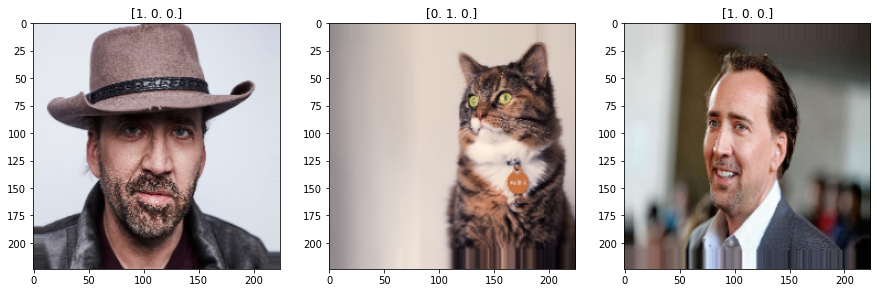

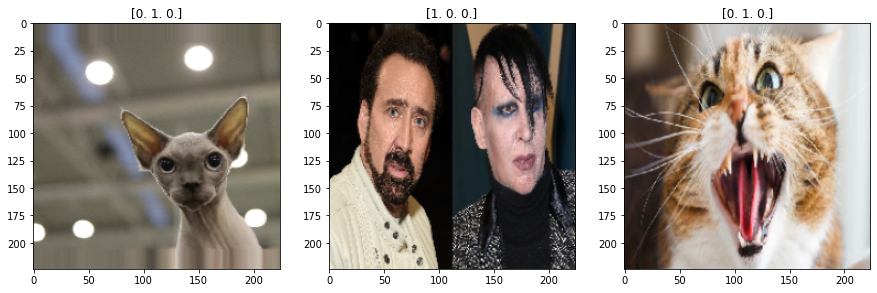

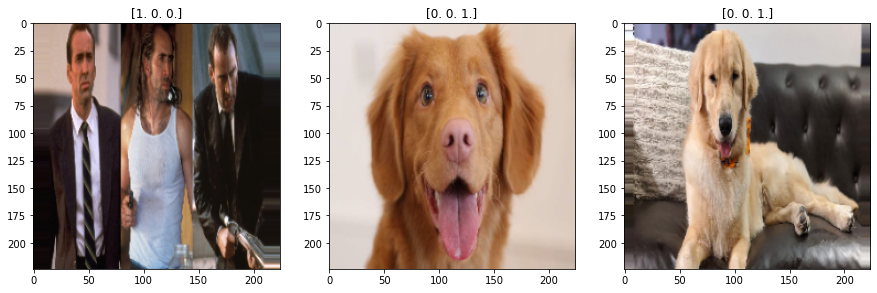

In [14]:
for images, labels in validation:
  counter = 0

  for i in range(1, 4):
    plt.figure(figsize=(15,7))
    for j in range(1, 4):
      ax = plt.subplot(1, 3, j)
      ax.set_title(str(labels[counter]))
      ax.imshow(images[counter])
      counter += 1
  
  break

Com isso já sabemos que as devidas classes ficaram:
* Nicolas Cage -> [1., 0., 0.]
* Gatos -> [0., 1., 0.]
* Cachorros -> [0.,0.,1.]


Daria para utilizar um dicionário para pegar tais valores.
```
results = {
    '[1 0 0]': 'Nicolas Cage',
    '[0 1 0]': 'Gatos',
    '[0 0 1]': 'Cachorros'
}
```



### Atividade 3: Definição do modelo e dos parâmetros para treinamento com o Tensorflow/Keras do zero ("from scratch")

Para o modelo de extração de características e classificação utilizaremos uma rede CNN com camadas densas na saída. Em especial, utilizaremos blocos de convolução inspirados no trabalho da rede VGG19.

"Very Deep Convolutional Networks for Large-Scale Image Recognition"

https://arxiv.org/abs/1409.1556

In [21]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD

def define_model(show_summary=False):
  # Definicao de modelo CNN

  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3, activation='softmax'))

  # Compilando o modelo

  #opt = SGD(lr=0.001, momentum=0.9)
  opt = Adam(lr=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  if show_summary:
    print(model.summary())

  return model

In [22]:
model = define_model(show_summary=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 128)      

Para testar se os shapes das camadas estão de acordo, vamos tentar fazer uma predição aleatória com a imagem do Nick


In [18]:
model.predict(amostra_nicolas_cage)

array([[0.47640577, 0.3709915 , 0.15260264]], dtype=float32)

Agora, vamos iniciar o treinamento do modelo passando a os dados gerados de treinamento, de validação e a quantidade de épocas.

In [23]:
batch_size = 32
epochs = 10 # Poucas épocas só para otimizar o nosso tempo.

history = model.fit(
    training, # Função geradora de treinamento
    steps_per_epoch=training.samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

7/7 [==============================] - 85s 13s/step - loss: 14.3013 - accuracy: 0.3078 - val_loss: 1.7527 - val_accuracy: 0.2188


In [24]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.title('Loss Curves')
  plt.legend()
  plt.grid(True)

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Curves')
  plt.legend()
  plt.grid(True)

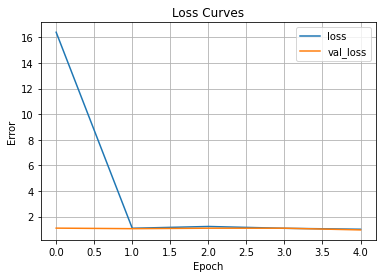

In [ ]:
plot_loss(history)

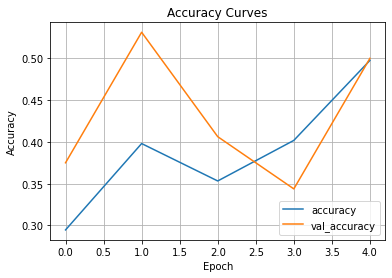

In [ ]:
plot_accuracy(history)

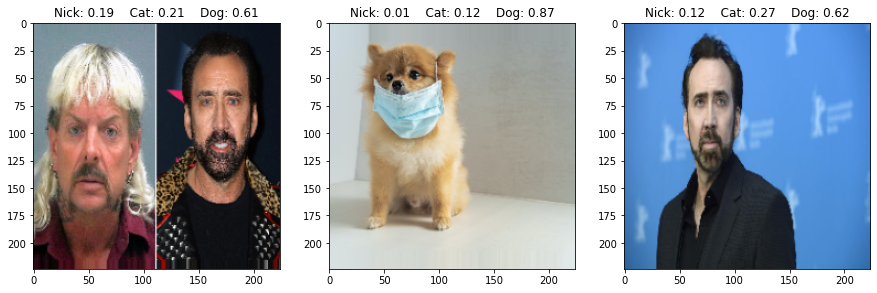

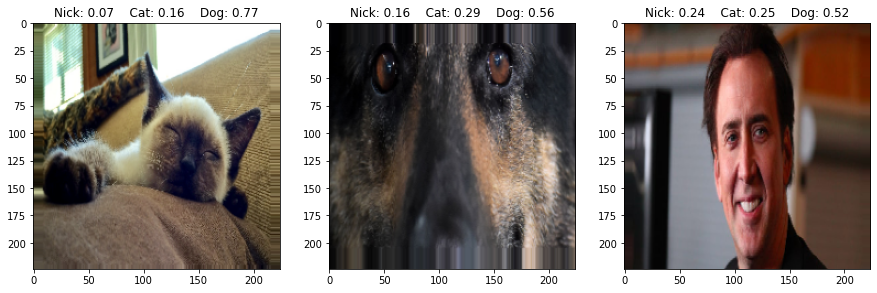

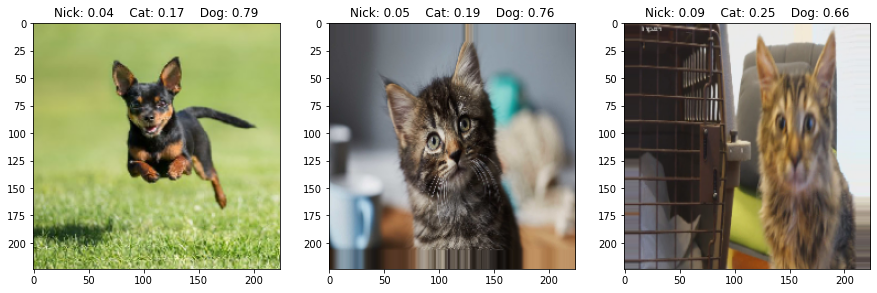

In [25]:
# Testando o modelo em um batch da validação

for images, labels in training:
  counter = 0
  predicted_labels = model.predict(images)

  for i in range(1, 4):
    plt.figure(figsize=(15,7))
    for j in range(1, 4):
      ax = plt.subplot(1, 3, j)
      ax.imshow(images[counter])

      ax.set_title('Nick: {:.2f}    Cat: {:.2f}    Dog: {:.2f}'.format(predicted_labels[counter][0], predicted_labels[counter][1], predicted_labels[counter][2]))
      counter += 1
  
  break

### Atividade 4: Utilização de modelos pré-treinados disponibilizados já pela biblioteca do Tensoflow/Keras para utilização em tarefas de visão computacional.

Neste caso utilizaremos o conceito de "aprendizado por transferência" (transfer learning) para utilizar o conhecimento já presente em redes treinadas em milhares de imagens. Tal conhecimento é representado pelos pesos já treinados dessas redes gigantecas.

Tip: Para conferência dos diversos tipos de redes pré-treinadas disponíveis e suas acurácias no desafio do ImageNet, é só conferir no https://keras.io/api/applications/

Neste exemplo, utilizaremos a rede MobileNetV2 (https://keras.io/api/applications/mobilenet/).

Para utilização da rede pré-treinada, o tensorflow fornece o método de pré-processamento utilizado pelos autores do artigo de maneira simples.

In [27]:
pre_processing_img = tf.keras.applications.mobilenet_v2.preprocess_input

def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    
    X[0, ] = np.asarray(tf_load_img(
        img_file, 
        target_size=target_size)
    )

    return pre_processing_img(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


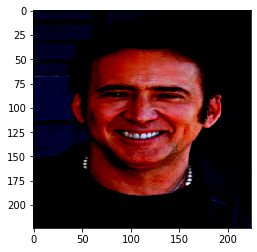

In [28]:
amostra_nicolas_cage = load_image('/content/downloads/Nicolas Cage/1.nicolas_cage_deauville_2013.jpg')

_ = plt.imshow(amostra_nicolas_cage.squeeze())

Vamos instanciar o modelo e dar uma olhada em sua arquitetura.

In [31]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2()
model.summary()

14540800/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________

Agora podemos checar qual o resultado da última camada de saída da rede, com base no que vimos no sumário da sua arquitetura, já dá pra saber o shape.

In [ ]:
print(f'shape: {amostra_nicolas_cage.shape}')
model.predict(amostra_nicolas_cage)

Como foi visto, as camadas densas finais do modelo retornam uma saída para identificação das 1000 classes. Como o nosso problema só tem 3 classes, precisamos refazer a parte final do modelo para fazer com que ele tenha 3 saídas apenas. Com isso, vamos utilizar o parâmetro "include_top" como "False" para que ele não inclua a última camada densa. Tal modelo, quando não utilizado com suas camadas densas originais, fornece a opção de utilização de uma camada de "pooling" para diminuição do shape de saída da rede para um tensor de 2D. Também vamos especificar o shape das imagens de entrada.

In [33]:
model_MobileNetV2 = tf.keras.applications.mobilenet_v2.MobileNetV2(
  input_shape=(224, 224, 3), 
  include_top=False,
  pooling='avg'
)

model_MobileNetV2.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
________________

Agora, vamos especificar quais serão as últimas camadas para o nosso modelo. Como ele apresenta um vetor com alta dimensionalidade como saída, vamos utilizar uma camada de dropout e uma camada densa com a quantidade de neurônios que temos interesse.

Para juntar um modelo pré-treinado com outras novas camadas, devemos utilizar uma API diferente da que estamos acostumados a utilizar `model = Sequential()` que possa nos dar mais liberdade para configuração do modelo.

Para isso vamos utilizar uma API funcional que apresenta características mais avançadas. Nela, podemos criar modelos customizados e identificar exatamente o servirá de input e output das camadas, geralmente seguindo o formato `model = Model(inputs=[...], outputs=[...])` 

In [ ]:
saida_da_MobileNet = model_MobileNetV2.output

camadas_extras = Dropout(0.4)(saida_da_MobileNet)
camadas_extras = Dense(3, activation='softmax')(camadas_extras)

# Linkando as camadas extras ao modelo da MobileNet
model = Model(model_MobileNetV2.inputs, camadas_extras)

model.summary()

Uma vez que estamos fazendo uso de aprendizado por transferência, as únicas camadas que precisam de ajuste são as que foram adicionadas. Portanto vamos congelar todas as outras e configurar somente a camada de pooling, dropout e densa para otimização.


In [ ]:
for layer in model.layers[:-3]:
    layer.trainable = False

model.summary()

In [36]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Vamos agora modificar o nosso gerador de "aumentações" dos dados para processar todas as imagens de entrada da rede seguindo os padrões da própria MobileNetV2

Primeiro vamos deletar as pastas com as imagens previamente aumentadas para depois poder conferir os novos exemplos pré-processados.

In [37]:
!rm -rf '/content/training_aug'
!rm -rf '/content/validation_aug'

In [38]:
pre_processing_img = tf.keras.applications.mobilenet_v2.preprocess_input

# Caso o Colab tenha gerado esse checkpoint dentro da pasta downloads.
#!rm -rf '/content/downloads/.ipynb_checkpoints'

criar_pasta('/content/training_aug')
criar_pasta('/content/validation_aug')

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=pre_processing_img,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

training = datagen.flow_from_directory( 
    '/content/downloads/', 
    target_size=(224, 224),
    batch_size=32,
    save_to_dir='/content/training_aug',
    subset='training'
) 

validation = datagen.flow_from_directory( 
    '/content/downloads/',
    target_size=(224, 224),
    batch_size=32,
    save_to_dir='/content/validation_aug',
    subset='validation'
) 

Found 235 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


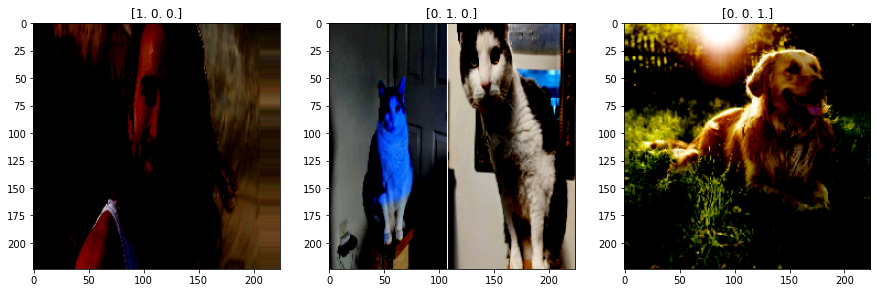

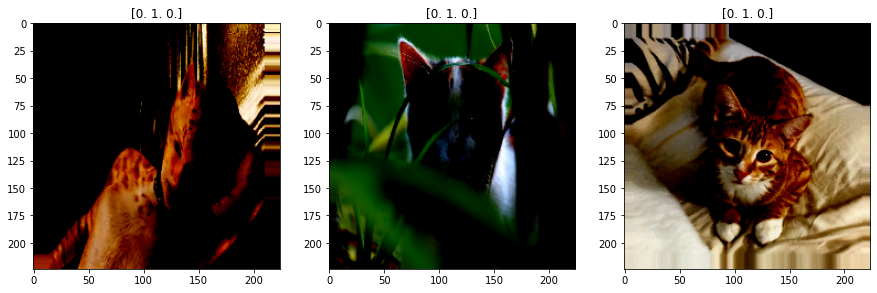

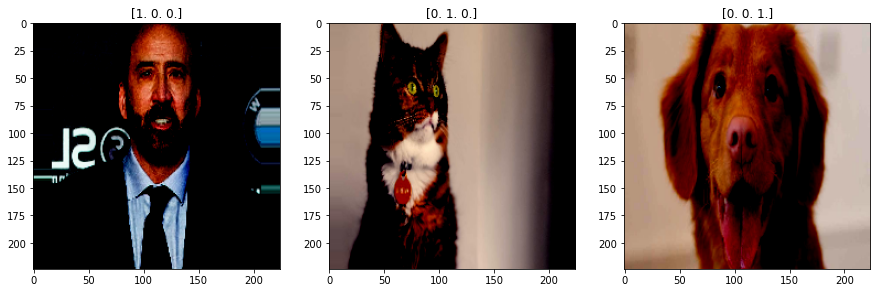

In [39]:
for images, labels in validation:
  counter = 0

  for i in range(1, 4):
    plt.figure(figsize=(15,7))
    for j in range(1, 4):
      ax = plt.subplot(1, 3, j)
      ax.set_title(str(labels[counter]))
      ax.imshow(images[counter])
      counter += 1
  
  break

Agora podemos treinar o nosso modelo para nossa tarefa de classificação. Como ele só precisa ter ajustado os parâmetros das últimas camadas e ele já foi treinado previamente para classificação com 1000 clases bem genéricas, é esperado que seu treino seja mais rápido e seus resultados melhores e mais eficientes.

In [40]:
batch_size = 32
epochs = 5 # Para ser justo com o outro modelo treinado do zero.

history = model.fit(
    training,
    steps_per_epoch=training.samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/5
7/7 [==============================] - 32s 4s/step - loss: 1.7196 - accuracy: 0.2989 - val_loss: 1.0608 - val_accuracy: 0.5625
Epoch 2/5
7/7 [==============================] - 26s 4s/step - loss: 0.9967 - accuracy: 0.5490 - val_loss: 0.5695 - val_accuracy: 0.8125
Epoch 3/5
7/7 [==============================] - 26s 4s/step - loss: 0.6152 - accuracy: 0.7674 - val_loss: 0.3381 - val_accuracy: 0.9375
Epoch 4/5
7/7 [==============================] - 26s 4s/step - loss: 0.3212 - accuracy: 0.9040 - val_loss: 0.2134 - val_accuracy: 0.9688
Epoch 5/5
7/7 [==============================] - 26s 4s/step - loss: 0.2645 - accuracy: 0.9055 - val_loss: 0.1043 - val_accuracy: 1.0000


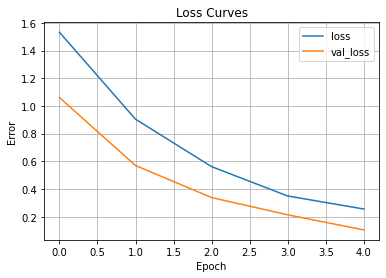

In [41]:
plot_loss(history)

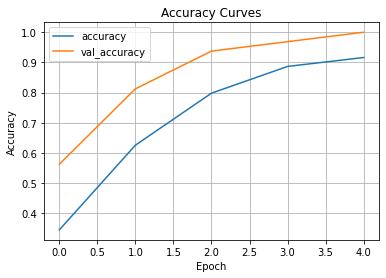

In [42]:
plot_accuracy(history)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


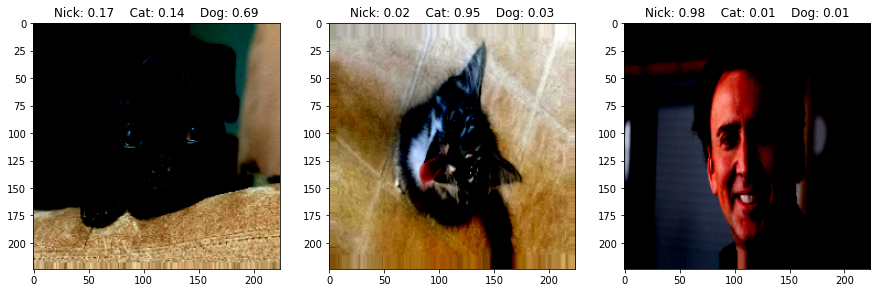

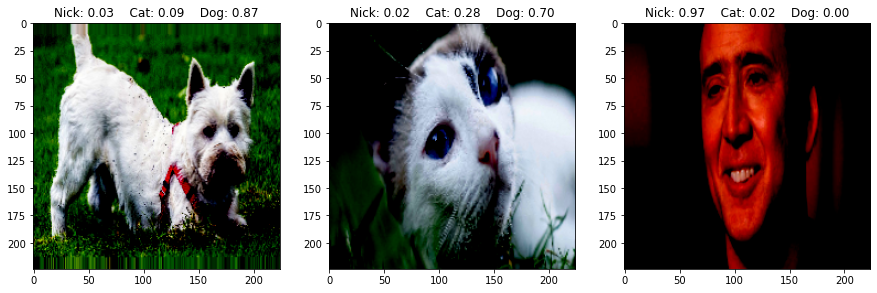

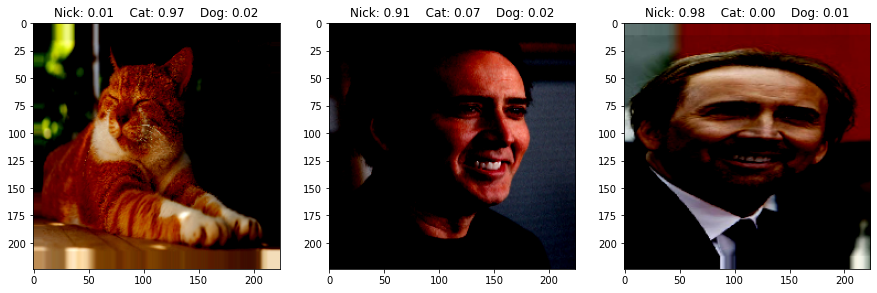

In [43]:
# Testando o modelo em um batch da validação

for images, labels in training:
  counter = 0
  predicted_labels = model.predict(images)

  for i in range(1, 4):
    plt.figure(figsize=(15,7))
    for j in range(1, 4):
      ax = plt.subplot(1, 3, j)
      ax.imshow(images[counter])

      ax.set_title('Nick: {:.2f}    Cat: {:.2f}    Dog: {:.2f}'.format(predicted_labels[counter][0], predicted_labels[counter][1], predicted_labels[counter][2]))
      counter += 1
  
  break

# Exercício

### Grupo (n° e nomes):
 - Joao do pé de feijão
 - ...
---

## Desafio da semana

Adaptar o modelo da MobileNet para fazer a classificação entre Gato x Cachorro x Nicolas Cage **x** Elon Musk!

Execute as etapas a seguir:

* Obtenha imagens online do Elon Musk para treinamento do modelo
* Cheque se existe alguma imagem inválida e a remova
* Adapte o modelo da MobileNetV2 para ter **4** saídas ao invés de 3
* Treine o modelo por **10** épocas e plote as curvas de erro e acurácia

### Obtenção das imagens do Elon Musk

In [ ]:
# Utilize as funções do googleimagesdownload




### Exclusão de imagens com problemas

In [ ]:
# Utilize a função "check_images"




### Defina o modelo da MobileNetV2 e configure a camada de saída para ter 4 neurônios

In [ ]:
# Dica: Mudar o valor da camada densa




### Treinamento e avaliação do modelo

In [ ]:
# Dica: Mude a quantidade de épocas e utilize as funções 
# plot_loss e plot_accuracy que já foram definidas


